In [1]:
import numpy as np
import pygrib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
from scipy import stats

In [2]:
S = 59*24+1
E = 151*24+1
data = []
for yl in range(18):
    grbs = pygrib.open('./data/ERA5-Land_9km/2m_temp_{0}.grib'.format(yl+2001)) 
    for i in range(S,E):
        data0 = grbs.message(i)
        data.append(data0)
    grbs.close()

In [3]:
daily_min = np.zeros((151,301,92*18))
daily_min = np.ma.array(daily_min)
for d in range(92*18):
    temp = np.zeros((151,301,24))
    temp = np.ma.array(temp)
    for i in range(24):
        temp[:,:,i] = data[d*24+i].data()[0]
    daily_min[:,:,d] = temp.min(axis=2)
daily_min.dump('min_temp')

In [3]:
daily_min = np.load('min_temp',allow_pickle=True)

In [6]:
grbs = pygrib.open('./data/ERA5-Land_9km/2m_temp_2001.grib') 
data = grbs.message(1)
lat, lon = data.latlons()

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


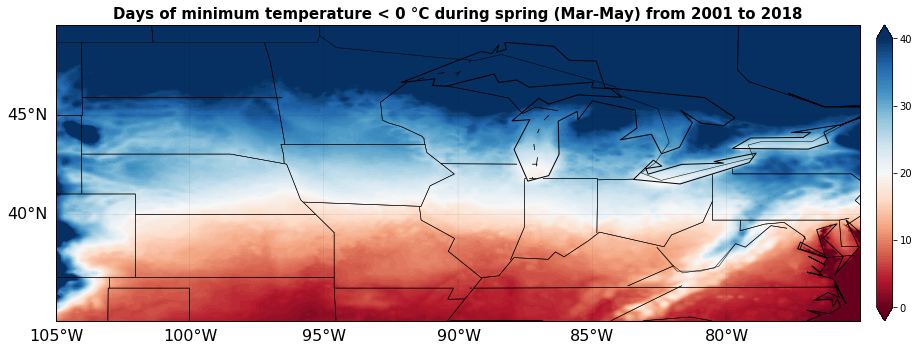

In [26]:
days = np.zeros((151,301))
for i in range(92*18):
    days = np.where(daily_min[:,:,i]<273.15, days+1, days)

days = days / 18

plt.figure(figsize=(15,12))
m = Basemap(projection='cea', lon_0=180, llcrnrlat=35, llcrnrlon=-105, urcrnrlat=50, urcrnrlon=-75,resolution='c')

x, y = m(lon, lat)
m.contourf(x, y, days, cmap='RdBu', levels=np.linspace(0,40,100),extend='both')
m.drawcoastlines()
m.drawmapboundary()  
m.drawstates()
m.drawcountries()  

m.drawparallels(np.arange(40, 50, 5), labels=[1,0,0,0], linewidth=0.1, fontsize=16, dashes=[2,2])
m.drawmeridians(np.arange(-105, -75, 5), labels=[0,0,0,1], linewidth=0.1, fontsize=16, dashes=[2,2])
m.colorbar(ticks=[0,10,20,30,40,50],size='2%')

plt.title('Days of minimum temperature < 0 \u00b0C during spring (Mar-May) from 2001 to 2018', fontsize = 15, fontweight='bold')
plt.savefig('plot/Summary/temp_0.png')

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


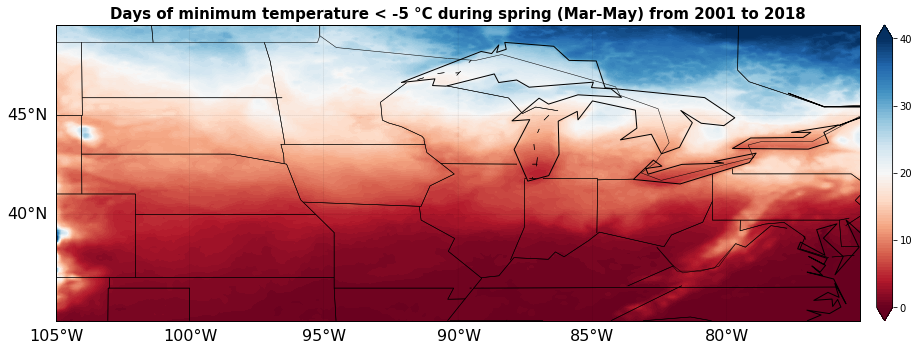

In [27]:
days = np.zeros((151,301))
for i in range(92*18):
    days = np.where(daily_min[:,:,i]<268.15, days+1, days)
days = days / 18

plt.figure(figsize=(15,12))
m = Basemap(projection='cea', lon_0=180, llcrnrlat=35, llcrnrlon=-105, urcrnrlat=50, urcrnrlon=-75,resolution='c')

x, y = m(lon, lat)
m.contourf(x, y, days, cmap='RdBu', levels=np.linspace(0,40,100),extend='both')
m.drawcoastlines()
m.drawmapboundary()  
m.drawstates()
m.drawcountries()  

m.drawparallels(np.arange(40, 50, 5), labels=[1,0,0,0], linewidth=0.1, fontsize=16, dashes=[2,2])
m.drawmeridians(np.arange(-105, -75, 5), labels=[0,0,0,1], linewidth=0.1, fontsize=16, dashes=[2,2])
m.colorbar(ticks=[0,10,20,30,40,50],size='2%')

plt.title('Days of minimum temperature < -5 \u00b0C during spring (Mar-May) from 2001 to 2018', fontsize = 15, fontweight='bold')
plt.savefig('plot/Summary/temp_5.png')

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


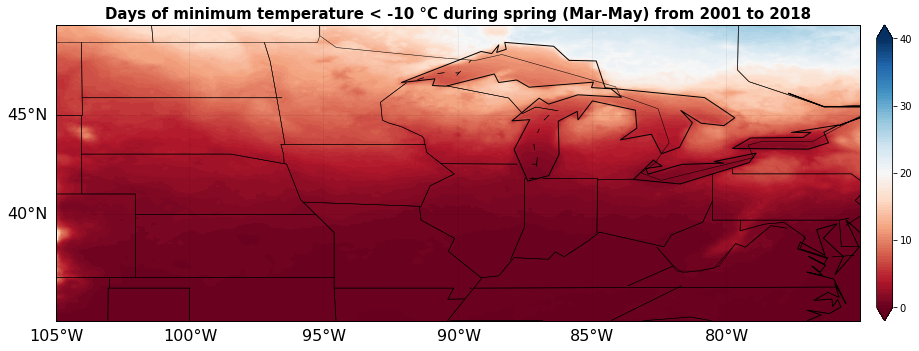

In [28]:
days = np.zeros((151,301))
for i in range(92*18):
    days = np.where(daily_min[:,:,i]<263.15, days+1, days)
days = days / 18

plt.figure(figsize=(15,12))
m = Basemap(projection='cea', lon_0=180, llcrnrlat=35, llcrnrlon=-105, urcrnrlat=50, urcrnrlon=-75,resolution='c')

x, y = m(lon, lat)
m.contourf(x, y, days, cmap='RdBu', levels=np.linspace(0,40,100),extend='both')
m.drawcoastlines()
m.drawmapboundary()  
m.drawstates()
m.drawcountries()  

m.drawparallels(np.arange(40, 50, 5), labels=[1,0,0,0], linewidth=0.1, fontsize=16, dashes=[2,2])
m.drawmeridians(np.arange(-105, -75, 5), labels=[0,0,0,1], linewidth=0.1, fontsize=16, dashes=[2,2])
m.colorbar(ticks=[0,10,20,30,40,50],size='2%')

plt.title('Days of minimum temperature < -10 \u00b0C during spring (Mar-May) from 2001 to 2018', fontsize = 15, fontweight='bold')
plt.savefig('plot/Summary/temp_10.png')

In [2]:
S = 91*24+1
E = 152*24+1
data = []
for yl in range(38):
    grbs = pygrib.open(f'./data/ERA5-Land_9km/2m_temp_{1981+yl}.grib') 
    for i in range(S,E):
        data0 = grbs.message(i)
        data.append(data0)
    grbs.close()

In [3]:
daily_min = np.zeros((151,301,61*38))
daily_min = np.ma.array(daily_min)
for d in range(61*38):
    temp = np.zeros((151,301,24))
    temp = np.ma.array(temp)
    for i in range(24):
        temp[:,:,i] = data[d*24+i].data()[0]
    daily_min[:,:,d] = temp.min(axis=2)

In [4]:
days = np.zeros((151,301))
for i in range(61*38):
    days = np.where(daily_min[:,:,i]<273.15, days+1, days)

days = days / 38


/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


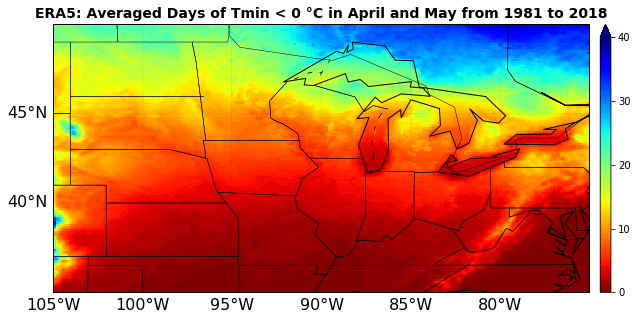

In [10]:
plt.figure(figsize=(10, 8))
m = Basemap(projection='cyl', lon_0=180, llcrnrlat=35, llcrnrlon=-105, urcrnrlat=50, urcrnrlon=-75, resolution='c')

x, y = m(lon, lat)
levels = MaxNLocator(nbins=100).tick_values(0, 40)
cmap = plt.get_cmap('jet_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

m.pcolormesh(x, y, days, cmap=cmap, norm=norm)

m.drawcoastlines()
m.drawmapboundary()  
m.drawstates()
m.drawcountries()  

m.drawparallels(np.arange(40, 50, 5), labels=[1,0,0,0], linewidth=0.1, fontsize=16, dashes=[2,2])
m.drawmeridians(np.arange(-105, -75, 5), labels=[0,0,0,1], linewidth=0.1, fontsize=16, dashes=[2,2])
m.colorbar(ticks=[0,10,20,30,40,50],size='2%', extend='max')

plt.title('ERA5: Averaged Days of Tmin < 0 \u00b0C in April and May from 1981 to 2018', fontsize = 14, fontweight='bold')
plt.savefig('./plot/freezing_days_ERA5.png')

In [22]:
y, x = 151,301
days = np.zeros((38, y, x))

for yl in range(38):
    for i in range(61):
        days[yl, :, :] = np.where(daily_min[:, :, i+yl*61]<273.15, days[yl, :, :]+1, days[yl, :, :])
    
X = np.linspace(1, 38, 38)
slope = np.array([[stats.linregress(X, days[:, i, j]).slope for j in range(x)] for i in range(y)])
pvalue = np.array([[stats.linregress(X, days[:, i, j]).pvalue for j in range(x)] for i in range(y)])

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


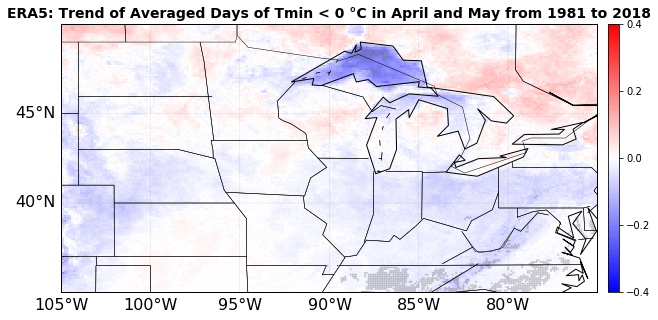

In [26]:
plt.figure(figsize=(10, 8))
m = Basemap(projection='cyl', lon_0=180, llcrnrlat=35, llcrnrlon=-105, urcrnrlat=50, urcrnrlon=-75, resolution='c')

x, y = m(lon, lat)
levels = MaxNLocator(nbins=100).tick_values(-.4, .4)
cmap = plt.get_cmap('bwr')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

m.pcolormesh(x, y, slope, cmap=cmap, norm=norm)
m.colorbar(ticks=[-.4, -.2, 0, .2, .4], size='2%')

plt.scatter(x, y, np.where(pvalue<0.05, 1, np.nan), 'grey', alpha=.3)

m.drawcoastlines()
m.drawmapboundary()  
m.drawstates()
m.drawcountries()  

m.drawparallels(np.arange(40, 50, 5), labels=[1,0,0,0], linewidth=0.1, fontsize=16, dashes=[2,2])
m.drawmeridians(np.arange(-105, -75, 5), labels=[0,0,0,1], linewidth=0.1, fontsize=16, dashes=[2,2])

plt.title('ERA5: Trend of Averaged Days of Tmin < 0 \u00b0C in April and May from 1981 to 2018', fontsize = 14, fontweight='bold')
plt.savefig('./plot/freezing_days_trend_45_ERA5.png')

In [2]:
days_12 = np.zeros((38, 151, 301))
for yl in range(38):
    grbs = pygrib.open(f'./data/ERA5-Land_9km/2m_temp_{1981+yl}.grib') 
    l = grbs.messages
    nd = round(l/24)
    yd = []
    
    if (l - 8759):
        for i in range(nd):
            dd = []
            for d in range(24):
                data0 = grbs.message(i*24+d+1)
                dd.append(data0.data()[0])
            dd = np.array(dd)
            yd.append(dd.min(axis=0))
        yd = np.array(yd)
        
        for k in range(nd):
            days_12[yl, :, :] = np.where(yd[k, :, :]<273.15, days_12[yl, :, :]+1, days_12[yl, :, :])

    else:
        for i in range(nd-1):
            dd = []
            for d in range(24):
                data0 = grbs.message(i*24+d+1)
                dd.append(data0.data()[0])
            dd = np.array(dd)
            yd.append(dd.min(axis=0))
        yd = np.array(yd)
        
        for k in range(nd-1):
            days_12[yl, :, :] = np.where(yd[k, :, :]<273.15, days_12[yl, :, :]+1, days_12[yl, :, :])

    grbs.close()

In [4]:
y, x = 151, 301
X = np.linspace(1, 38, 38)
slope_12 = np.array([[stats.linregress(X, days_12[:, i, j]).slope for j in range(x)] for i in range(y)])
pvalue_12 = np.array([[stats.linregress(X, days_12[:, i, j]).pvalue for j in range(x)] for i in range(y)])

np.save('slope_12_era5', slope_12)
np.save('pvalue_12_era5', pvalue_12)

/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
/home/mmfire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


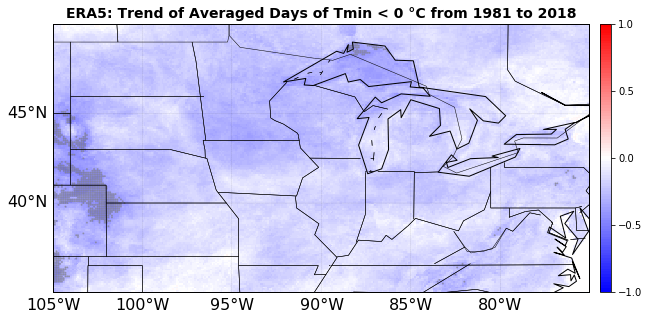

In [12]:
plt.figure(figsize=(10, 8))
m = Basemap(projection='cyl', lon_0=180, llcrnrlat=35, llcrnrlon=-105, urcrnrlat=50, urcrnrlon=-75, resolution='c')

x, y = m(lon, lat)
levels = MaxNLocator(nbins=100).tick_values(-1, 1)
cmap = plt.get_cmap('bwr')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

m.pcolormesh(x, y, slope_12, cmap=cmap, norm=norm)
m.colorbar(ticks=[-1, -.5, 0, .5, 1], size='2%')

plt.scatter(x, y, np.where(pvalue_12<0.05, 1, np.nan), 'grey', alpha=.5)

m.drawcoastlines()
m.drawmapboundary()  
m.drawstates()
m.drawcountries()  

m.drawparallels(np.arange(40, 50, 5), labels=[1,0,0,0], linewidth=0.1, fontsize=16, dashes=[2,2])
m.drawmeridians(np.arange(-105, -75, 5), labels=[0,0,0,1], linewidth=0.1, fontsize=16, dashes=[2,2])

plt.title('ERA5: Trend of Averaged Days of Tmin < 0 \u00b0C from 1981 to 2018', fontsize = 14, fontweight='bold')
plt.savefig('./plot/freezing_days_trend_12_ERA5.png')